In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QDFdQ31BfuYd3Bg7lHYkCN28RIUhhyOXuH-bYK0X_U3Q',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypreedei-donotdelete-pr-og71auodofrmxr'
object_key = 'Admission_Predict1.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
data.shape

(400, 9)

In [6]:
print("Number of Rows: " ,data.shape[0])
print("Number of Columns: " ,data.shape[1])

Number of Rows:  400
Number of Columns:  9


In [7]:
#4. Get information about our dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Check null values in the dataset

In [9]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Get the overall Statistics about the dataset

In [10]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
data.head(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


In [13]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
data=data.drop('Serial No.',axis=1)

In [15]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Store Feature Matrix in X and Response(Target) in vector Y

In [16]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [17]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
X=data.drop('Chance of Admit ',axis=1)

In [19]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [20]:
y=data['Chance of Admit ']

In [21]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

# Data Visualization

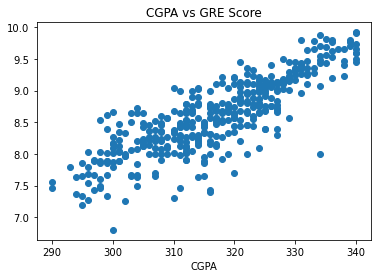

In [22]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.xlabel('CGPA')
plt.show()

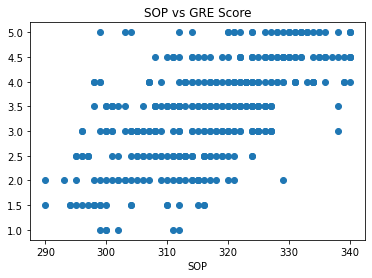

In [23]:
plt.scatter(data['GRE Score'],data['SOP'])
plt.title('SOP vs GRE Score')
plt.xlabel('GRE Score')
plt.xlabel('SOP')
plt.show()

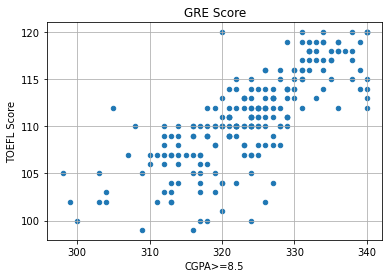

In [24]:
data[data.CGPA>=8.5].plot(kind='scatter',x='GRE Score',y='TOEFL Score')

plt.title("GRE Score")
plt.xlabel("TOEFL Score")
plt.xlabel("CGPA>=8.5")
plt.grid(True)
plt.show()

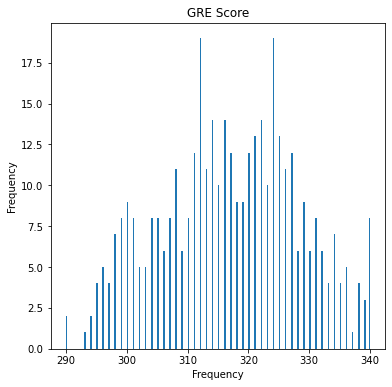

In [25]:
data["GRE Score"].plot(kind='hist',bins=200,figsize=(6,6))
plt.title('GRE Score')
plt.xlabel('GRE Score')
plt.xlabel('Frequency')
plt.show()

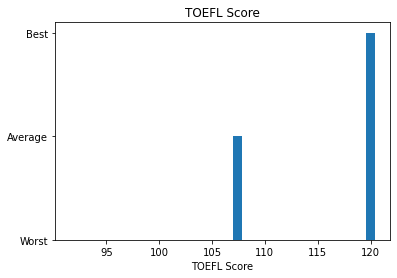

In [26]:
p=np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r=["Worst","Average","Best"]
plt.bar(p,r)

plt.title('TOEFL Score')
plt.xlabel('Level')
plt.xlabel('TOEFL Score')
plt.show()

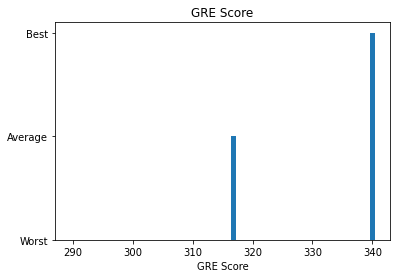

In [27]:
p=np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
r=["Worst","Average","Best"]
plt.bar(p,r)

plt.title('GRE Score')
plt.xlabel('Level')
plt.xlabel('GRE Score')
plt.show()

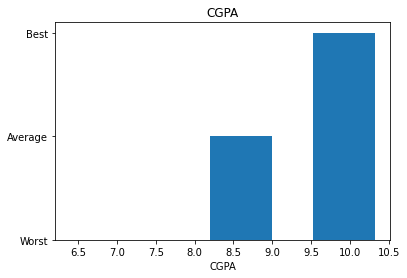

In [28]:
p=np.array([data["CGPA"].min(),data["CGPA"].mean(),data["CGPA"].max()])
r=["Worst","Average","Best"]
plt.bar(p,r)

plt.title('CGPA')
plt.xlabel('Level')
plt.xlabel('CGPA')
plt.show()

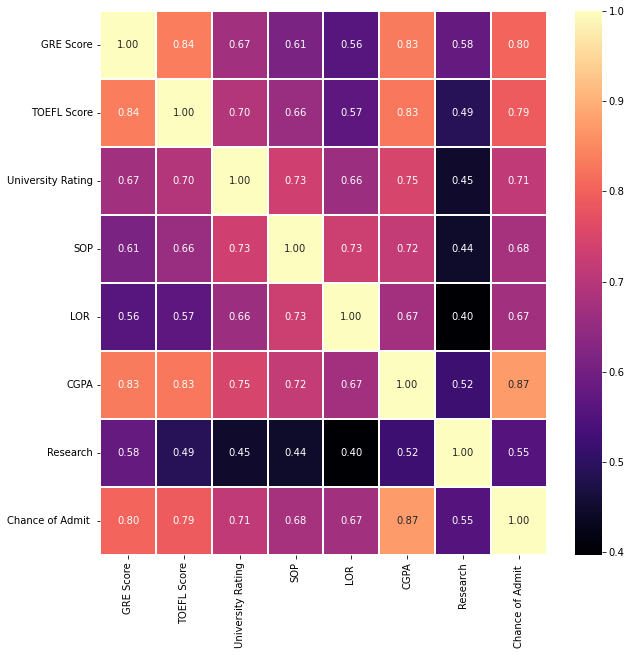

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f',cmap="magma")
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

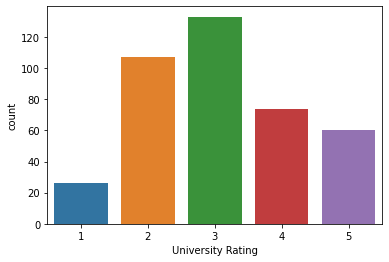

In [30]:
data.Research.value_counts()
sns.countplot(x="University Rating",data=data)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

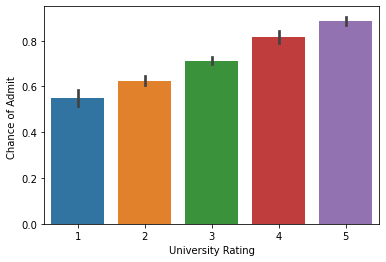

In [31]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

# 9. Splitting the dataset into the training set and test set

In [32]:
from sklearn.model_selection import train_test_split 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [34]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
139,318,109,1,3.5,3.5,9.12,0
169,311,99,2,2.5,3.0,7.98,0
340,312,107,3,3.0,3.0,8.46,1
130,339,114,5,4.0,4.5,9.76,1
394,329,111,4,4.5,4.0,9.23,1
...,...,...,...,...,...,...,...
39,307,108,2,4.0,3.5,7.70,0
224,305,105,2,3.0,2.0,8.23,0
261,312,104,3,3.5,4.0,8.09,0
174,321,111,4,4.0,4.0,8.97,1


In [35]:
X.shape

(400, 7)

In [36]:
y.shape

(400,)

In [37]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
139,318,109,1,3.5,3.5,9.12,0
169,311,99,2,2.5,3.0,7.98,0
340,312,107,3,3.0,3.0,8.46,1
130,339,114,5,4.0,4.5,9.76,1
394,329,111,4,4.5,4.0,9.23,1
...,...,...,...,...,...,...,...
39,307,108,2,4.0,3.5,7.70,0
224,305,105,2,3.0,2.0,8.23,0
261,312,104,3,3.5,4.0,8.09,0
174,321,111,4,4.0,4.0,8.97,1


In [38]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
356,327,109,3,3.5,4.0,8.77,1
66,327,114,3,3.0,3.0,9.02,0
168,293,97,2,2.0,4.0,7.80,1
54,322,110,3,3.0,3.5,8.00,0
351,325,110,4,3.5,4.0,8.67,1
135,314,109,4,3.5,4.0,8.77,1
128,326,112,3,3.5,3.0,9.10,1
298,330,114,3,4.5,4.5,9.24,1
307,325,112,4,4.0,4.0,9.00,1
49,327,111,4,3.0,4.0,8.40,1


In [39]:
y_train

139    0.78
169    0.65
340    0.75
130    0.96
394    0.89
       ... 
39     0.48
224    0.67
261    0.71
174    0.87
5      0.90
Name: Chance of Admit , Length: 340, dtype: float64

In [40]:
y_test

356    0.79
66     0.61
168    0.64
54     0.70
351    0.73
135    0.82
128    0.84
298    0.90
307    0.80
49     0.78
87     0.66
312    0.78
218    0.84
379    0.71
290    0.58
186    0.84
19     0.62
303    0.73
183    0.75
281    0.80
399    0.95
171    0.89
13     0.62
188    0.93
10     0.52
338    0.81
285    0.93
81     0.96
395    0.82
126    0.85
60     0.48
377    0.47
184    0.72
7      0.68
252    0.71
200    0.73
199    0.72
127    0.78
257    0.78
159    0.52
221    0.75
9      0.45
122    0.57
132    0.71
69     0.78
203    0.97
106    0.87
131    0.77
74     0.74
295    0.68
269    0.77
71     0.96
206    0.63
53     0.72
146    0.75
277    0.70
375    0.38
25     0.94
353    0.63
97     0.86
Name: Chance of Admit , dtype: float64

In [41]:
y_train=(y_train>0.5)
y_train

139     True
169     True
340     True
130     True
394     True
       ...  
39     False
224     True
261     True
174     True
5       True
Name: Chance of Admit , Length: 340, dtype: bool

In [42]:
y_test=(y_test>0.5)
y_test

356     True
66      True
168     True
54      True
351     True
135     True
128     True
298     True
307     True
49      True
87      True
312     True
218     True
379     True
290     True
186     True
19      True
303     True
183     True
281     True
399     True
171     True
13      True
188     True
10      True
338     True
285     True
81      True
395     True
126     True
60     False
377    False
184     True
7       True
252     True
200     True
199     True
127     True
257     True
159     True
221     True
9      False
122     True
132     True
69      True
203     True
106     True
131     True
74      True
295     True
269     True
71      True
206     True
53      True
146     True
277     True
375    False
25      True
353     True
97      True
Name: Chance of Admit , dtype: bool

# Import the Model

In [43]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 12. Model Training

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [45]:
gr.score(X_test,y_test)

-0.2243993827051629

In [46]:
y_predict=gr.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.10800112272639416
Mean Squared Error: 0.07618485047943237
Root Mean Squared Error: 0.27601603301154876


In [48]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [49]:
from sklearn.linear_model._logistic import LogisticRegression
lore = LogisticRegression(random_state=0, max_iter=1000)
lr = lore.fit(X_train, y_train)

In [50]:
y_pred = lr.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.95
Recall Score: 1.0
ROC AUC Score: 0.625
Confussion Matrix:
 [[ 1  3]
 [ 0 56]]


# Classification

In [52]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [53]:
import numpy as np

In [54]:
y_train=[1 if value>0.8 else 0 for value in y_train]
y_test=[1 if value>0.8 else 0 for value in y_test]

y_train=np.array(y_train)
y_test=np.array(y_test)

In [55]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 17. Save the Model

In [56]:
import pickle

In [57]:
pickle.dump(lr, open("university.pkl", "wb"))

In [58]:
lr = pickle.load(open("university.pkl", "rb"))

In [59]:
pwd

'/home/wsuser/work'

# Deployment

In [60]:
!pip install -U ibm-watson-machine-learning

In [61]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate and Set Space

In [62]:
wml_credentials={
    "apikey":"3gcatXNG1U1Nbp9Rps1_keWRVw7uLaRttNtwjDUTTxNr","url":"https://us-south.ml.cloud.ibm.com"
}

In [63]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
12632caa-f38b-4efb-bb57-378271f17485  prediction data  2022-11-11T07:36:26.891Z
------------------------------------  ---------------  ------------------------


In [64]:
SPACE_ID="12632caa-f38b-4efb-bb57-378271f17485"

In [65]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [66]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

# Save and Deploy the model

In [67]:
import sklearn
sklearn.__version__

'1.0.2'

In [68]:
MODEL_NAME = 'DemoModel'
DEPLOYMENT_NAME = 'demo_deploy'
DEMO_MODEL = gr

In [69]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [70]:
#setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
 }

In [71]:
#save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T14:11:55.135Z',
  'id': 'da49834e-5351-4448-8074-e9dc3c1a1ab3',
  'modified_at': '2022-11-18T14:11:57.873Z',
  'name': 'DemoModel',
  'owner': 'IBMid-664003ZJ3J',
  'resource_key': 'ed16de7d-73b4-44ce-9448-e7d87c8bb018',
  'space_id': '12632caa-f38b-4efb-bb57-378271f17485'},
 'system': {'warnings': []}}

In [73]:
model_id = wml_client.repository.get_model_id(model_details)

In [74]:
model_id

'da49834e-5351-4448-8074-e9dc3c1a1ab3'

In [75]:
#set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
#deploy
deployment = wml_client.deployments.create(
artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'da49834e-5351-4448-8074-e9dc3c1a1ab3' started

#######################################################################################


initializing